In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
u_cols = ['user_id','age','gender','Occupation','Zip code']
users = pd.read_csv('Downloads/archive (2)/ml-100k/u.user', names=u_cols,sep='|')
users.head()

,user_id,age,gender,Occupation,Zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
users.shape

(943, 5)

In [5]:
col_n = ['movie_id' , 'title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
movies  = pd.read_csv('Downloads/archive (2)/ml-100k/u.item', names = col_n, sep='|',  encoding='latin-1')
movies.head()

,movie_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
use_cols= ['user_id', 'item id',  'rating',  'timestamp' ]

rating=pd.read_csv('Downloads/archive (2)/ml-100k/u.data' , names=use_cols,encoding='latin-1', sep='\t')
rating.head()

,user_id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
users.isna().sum()

user_id       0
age           0
gender        0
Occupation    0
Zip code      0
dtype: int64

In [8]:
movies.isna().sum()

movie_id                 0
title                    0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [9]:
rating.isna().sum()

user_id      0
item id      0
rating       0
timestamp    0
dtype: int64

In [10]:
movies_ratings = pd.merge(rating,users)

In [11]:
movies_ratings

,user_id,item id,rating,timestamp,age,gender,Occupation,Zip code
0,196,242,3,881250949,49,M,writer,55105
1,186,302,3,891717742,39,F,executive,00000
2,22,377,1,878887116,25,M,writer,40206
3,244,51,2,880606923,28,M,technician,80525
4,166,346,1,886397596,47,M,educator,55113
...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,13,M,student,83702
99996,716,204,5,879795543,36,F,administrator,44265
99997,276,1090,1,874795795,21,M,student,95064
99998,13,225,2,882399156,47,M,educator,29206


In [12]:
df = pd.merge(movies_ratings, movies, left_on="item id", right_on="movie_id")

In [13]:
print(df.columns)

Index(['user_id', 'item id', 'rating', 'timestamp', 'age', 'gender',
       'Occupation', 'Zip code', 'movie_id', 'title', 'release date',
       'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [14]:
df.head()

,user_id,item id,rating,timestamp,age,gender,Occupation,Zip code,movie_id,title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,302,L.A. Confidential (1997),...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,377,Heavyweights (1994),...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,51,Legends of the Fall (1994),...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,346,Jackie Brown (1997),...,0,0,0,0,0,0,0,0,0,0


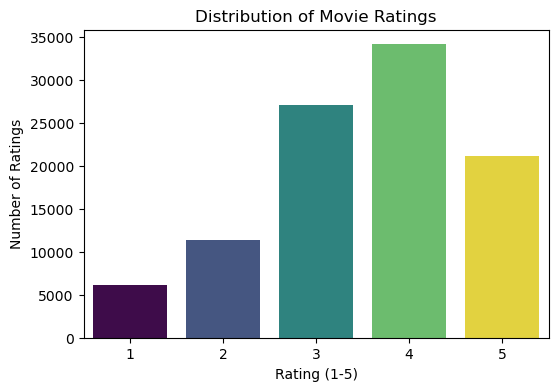

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, palette='viridis',hue='rating', legend=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Ratings')
plt.show()

In [16]:
movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']


In [17]:
movie_stats

,mean_rating,rating_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


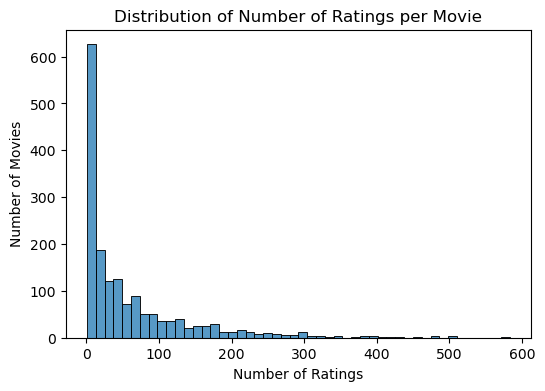

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(movie_stats['rating_count'])
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

In [19]:
popular_movies = movie_stats[movie_stats['rating_count'] > 100]
popular_movies_in_order=popular_movies.sort_values('rating_count',ascending=False)
popular_movies_in_order

,mean_rating,rating_count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
Miracle on 34th Street (1994),3.722772,101
Pinocchio (1940),3.673267,101
Basic Instinct (1992),3.227723,101


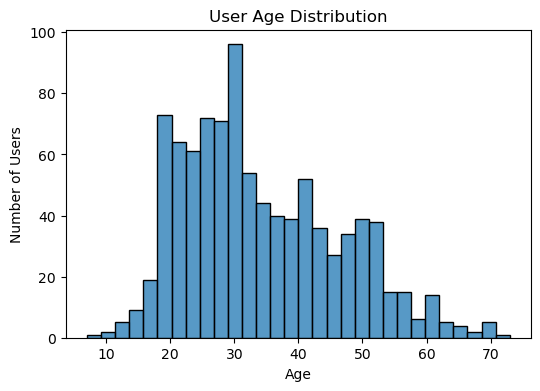

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(users['age'], bins=30, kde=False)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

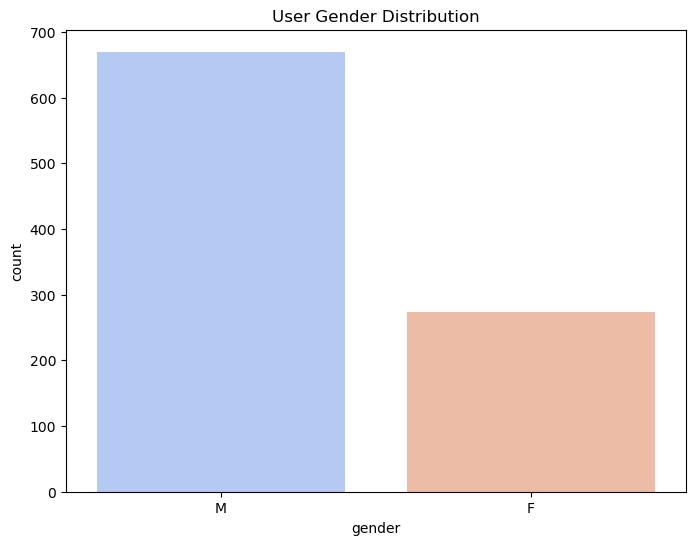

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=users, palette='coolwarm',hue='gender')
plt.title('User Gender Distribution')
plt.show()

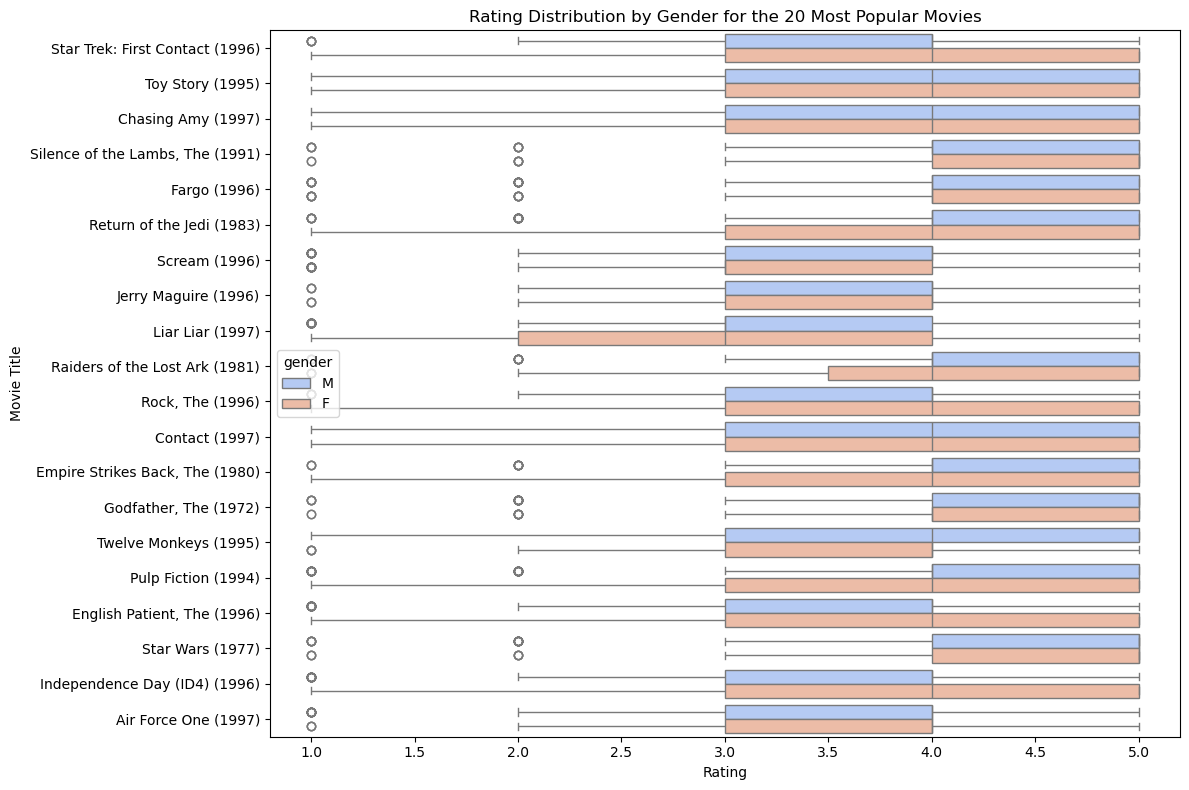

In [22]:
top_movie_titles = popular_movies.sort_values('rating_count', ascending=False).head(20).index
top_movies_df = df[df['title'].isin(top_movie_titles)]
plt.figure(figsize=(12, 8))
sns.boxplot(y='title', x='rating', hue='gender', data=top_movies_df, orient='h', palette='coolwarm')
plt.title('Rating Distribution by Gender for the 20 Most Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

In [23]:
# Genre columns (already correct)
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's",
              'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
              'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the dataframe to long format
genres_df = movies.melt(id_vars='movie_id', 
                        value_vars=genre_cols, 
                        var_name='genre', 
                        value_name='is_genre')

# Keep only rows where genre is 1
genres_df = genres_df[genres_df['is_genre'] == 1]

In [24]:
genres_df

,movie_id,genre,is_genre
266,267,unknown,1
1372,1373,unknown,1
1683,2,Action,1
1685,4,Action,1
1698,17,Action,1
...,...,...,...
31463,1188,Western,1
31522,1247,Western,1
31729,1454,Western,1
31730,1455,Western,1


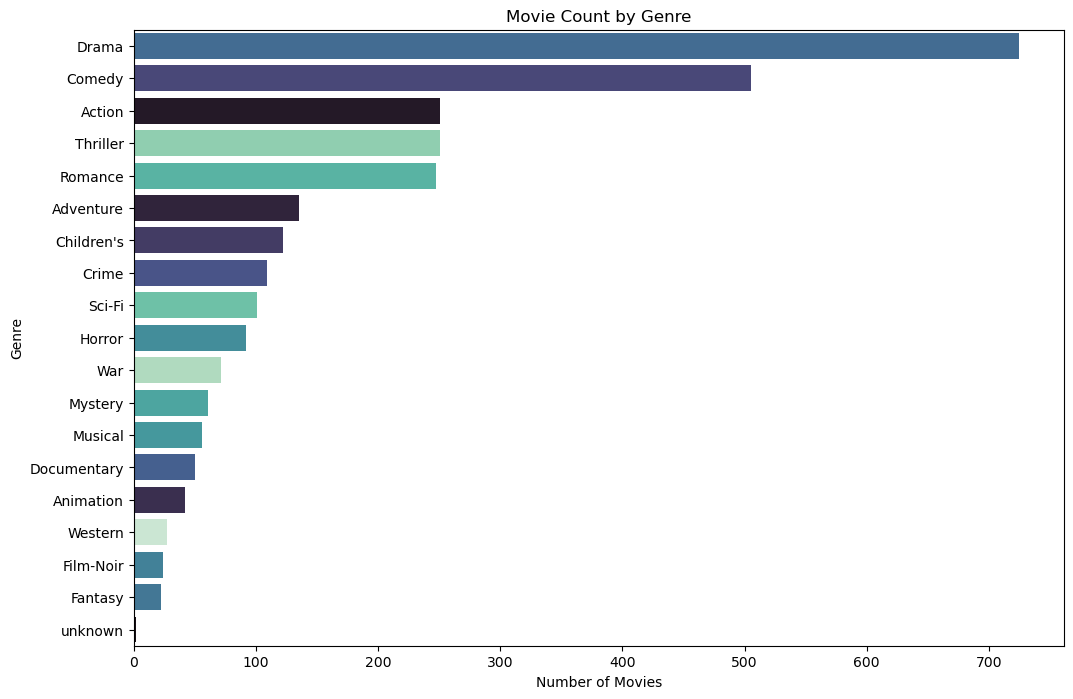

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(y='genre', data=genres_df, order=genres_df['genre'].value_counts().index, palette='mako',hue='genre')
plt.title('Movie Count by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show;

In [26]:
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
print("\tUser-Movie Rating Matrix (first 5x5)")
print("\tThis sparse matrix is the basis for many recommendation algorithms.")
user_movie_matrix.iloc[:5, :5]

	User-Movie Rating Matrix (first 5x5)
	This sparse matrix is the basis for many recommendation algorithms.


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997)
user_id,,,,,
1,NaN,NaN,2.0,5.0,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN


In [27]:
user_movie_matrix.iloc[:5, :5].fillna('-')


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997)
user_id,,,,,
1,-,-,2.0,5.0,-
2,-,-,-,-,-
3,-,-,-,-,2.0
4,-,-,-,-,-
5,-,-,2.0,-,-


In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
def load_data():
    """
    Loads the MovieLens 100k dataset.
    Uses the u1.base and u1.test files for a pre-defined 80/20 split.
    """
    # Define column names for the ratings data
    r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
    
    # Load the training and test sets from the correct path
    # In Kaggle, input files are typically in /kaggle/input/<dataset-folder>/
    ratings_train = pd.read_csv('Downloads/archive (2)/ml-100k/u1.base', sep='\t', names=r_cols)
    ratings_test = pd.read_csv('Downloads/archive (2)/ml-100k/u1.test', sep='\t', names=r_cols)

    # Define column names for the movie data - this is the corrected part
    # The u.item file has 24 columns, so we need 24 names.
    m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 
              'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    movies = pd.read_csv('Downloads/archive (2)/ml-100k/u.item', sep='|', names=m_cols, usecols=['movie_id', 'title'], encoding='latin-1')

    # Merge ratings data with movie titles
    train_df = pd.merge(ratings_train, movies, on='movie_id')
    test_df = pd.merge(ratings_test, movies, on='movie_id')
    
    print("Data loaded and merged successfully.")
    return train_df, test_df

In [30]:
def create_user_item_matrix(df):
    """
    Creates the user-item matrix from the ratings dataframe.
    Rows are users, columns are movies, values are ratings.
    NaNs are filled with 0.
    """
    user_item_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
    # Fill missing values with 0 (meaning the user has not rated the movie)
    user_item_matrix = user_item_matrix.fillna(0)
    return user_item_matrix


In [31]:
def get_recommendations(user_id, user_item_matrix, user_similarity_df, n_recommendations=10):
    """
    Generates movie recommendations for a given user.
    
    Args:
        user_id (int): The ID of the user to get recommendations for.
        user_item_matrix (pd.DataFrame): The user-item rating matrix.
        user_similarity_df (pd.DataFrame): The user-user similarity matrix.
        n_recommendations (int): The number of recommendations to return.
        
    Returns:
        pd.Series: A Series of recommended movie titles, sorted by predicted score.
    """
    # Get similarity scores for the target user and sort them
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    
    # Get the movies the target user has already rated
    seen_movies = user_item_matrix.loc[user_id]
    seen_movies = seen_movies[seen_movies > 0].index
    
    # Dictionary to store recommendation scores
    recommendation_scores = {}
    
    # Iterate through other users, from most similar to least
    for other_user_id, similarity_score in similar_users.items():
        # Skip the user themselves
        if other_user_id == user_id:
            continue
            
        # Get the movies rated by the similar user
        other_user_ratings = user_item_matrix.loc[other_user_id]
        
        # Consider movies the other user rated positively (e.g., > 3)
        for movie, rating in other_user_ratings[other_user_ratings > 3].items():
            # If the movie is new to our target user, calculate a score
            if movie not in seen_movies:
                # The score is the similar user's rating weighted by the similarity
                if movie not in recommendation_scores:
                    recommendation_scores[movie] = 0
                recommendation_scores[movie] += rating * similarity_score
                
    # Convert the scores dictionary to a pandas Series and sort
    recommended_movies_df = pd.Series(recommendation_scores).sort_values(ascending=False)
    
    return recommended_movies_df.head(n_recommendations)

In [32]:
def precision_at_k(test_df, recommendations_df, k=10):
    # A relevant item is a movie the user rated highly (e.g., 4 or 5)
    high_rating_threshold = 4.0
    
    # Get the actual liked movies for each user in the test set
    user_actual_likes = test_df[test_df['rating'] >= high_rating_threshold]\
                        .groupby('user_id')['title'].apply(list).to_dict()

    precisions = []
    for user_id, recommendations in recommendations_df.iterrows():
        if user_id in user_actual_likes:
            actual = user_actual_likes[user_id]
            predicted = recommendations['recommendations']
            
            # Find the intersection of predicted and actual liked movies
            hits = len(set(predicted) & set(actual))
            
            # Precision = (number of hits) / k
            precision = hits / k
            precisions.append(precision)
            
    # Return the average precision
    return np.mean(precisions) if precisions else 0.0

In [ ]:
# 1. Load and prepare the data
train_df, test_df = load_data()

# 2. Create the user-item matrix from the training data
train_user_item_matrix = create_user_item_matrix(train_df)

# 3. Compute user similarity using cosine similarity
# The matrix must be (users, features), so we use the matrix as is.
user_similarity = cosine_similarity(train_user_item_matrix)
# Wrap it in a DataFrame for easier access with user_id labels
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=train_user_item_matrix.index, 
                                  columns=train_user_item_matrix.index)

print("\nUser similarity matrix computed.")

# --- DEMONSTRATION: Get recommendations for a sample user ---
SAMPLE_USER_ID = 69
print(f"\n--- Getting Top 10 Recommendations for User ID: {SAMPLE_USER_ID} ---")

# Get movies the user has actually rated highly in the training set
user_50_ratings = train_df[(train_df['user_id'] == SAMPLE_USER_ID) & (train_df['rating'] == 5)]
print("Movies User {} rated 5 stars (in training data):".format(SAMPLE_USER_ID))
for movie in user_50_ratings['title']:
    print(f"- {movie}")

# Generate and print recommendations
recommendations = get_recommendations(SAMPLE_USER_ID, train_user_item_matrix, user_similarity_df, n_recommendations=10)
print("\nRecommended Movies:")
print(recommendations)

# --- EVALUATION ---
print("\n--- Evaluating Model Performance on Test Set ---")
K = 10

# Get recommendations for all users in the test set
test_users = test_df['user_id'].unique()
all_recommendations = {}

for user_id in test_users:
    # Check if user exists in the training matrix (some test users might be new)
    if user_id in train_user_item_matrix.index:
        user_recs = get_recommendations(user_id, train_user_item_matrix, user_similarity_df, n_recommendations=K)
        all_recommendations[user_id] = list(user_recs.index)

# Corrected DataFrame creation: Convert the dictionary to a Series, then to a DataFrame.
# This correctly handles the list of recommendations as a single column entry.
recommendations_df = pd.Series(all_recommendations).to_frame('recommendations')

# Calculate Precision@K
avg_precision = precision_at_k(test_df, recommendations_df, k=K)

print(f"\nAverage Precision at K={K}: {avg_precision:.4f}")

Data loaded and merged successfully.

User similarity matrix computed.

--- Getting Top 10 Recommendations for User ID: 69 ---
Movies User 69 rated 5 stars (in training data):
- Twelve Monkeys (1995)
- Clerks (1994)
- Star Wars (1977)
- Silence of the Lambs, The (1991)
- Empire Strikes Back, The (1980)
- Return of the Jedi (1983)
- Graduate, The (1967)
- Jaws (1975)
- Chasing Amy (1997)
- Scream (1996)
- Quiet Room, The (1996)

Recommended Movies:
Fargo (1996)                        248.747869
Godfather, The (1972)               234.859948
Raiders of the Lost Ark (1981)      226.529550
Toy Story (1995)                    217.544976
Contact (1997)                      202.047676
Pulp Fiction (1994)                 188.229364
Titanic (1997)                      169.648361
Schindler's List (1993)             168.494774
Princess Bride, The (1987)          164.066150
Shawshank Redemption, The (1994)    161.422292
dtype: float64

--- Evaluating Model Performance on Test Set ---
